**AIM:** *To Apply Different ML methods to classify on this dataset, and combine multiple methods to get higher accuracy, approach known as ***Ensemble Machine Learning***

**Overview:**

In this notebook an attempt is made at understanding features while *exploring and visualizing* the heart disease dataset. Basically I tried to show distribution of data, relations between variables and target as well as correlations between each other then did some basic model building.

**Dataset Description:**

The data includes 303 patient level features including if they have heart disease or not. Features are like;

**Age:
Sex:**
0: Female
1: Male
**Chest Pain Type:**
0: Typical Angina
1: Atypical Angina
2: Non-Anginal Pain
3: Asymptomatic
**Resting Blood Pressure:** Person's resting blood pressure.
Cholesterol: Serum Cholesterol in mg/dl
**Fasting Blood Sugar:**
0:Less Than 120mg/ml
1: Greater Than 120mg/ml
**Resting Electrocardiographic Measurement:**
0: Normal
1: ST-T Wave Abnormality
2: Left Ventricular Hypertrophy
Max Heart Rate Achieved: Maximum Heart Rate Achieved
**Exercise Induced Angina:**
1: Yes
0: No 
**etc**


After some usual exploratory data analysis (EDA) I noticed some of the results doesn't make sense, and then I found this topic here. The ultimate guide to this dataset!, his points made sense so I decided to use this dataset after inspecting it: **Heart Disease Cleveland UCI.** from the official repository

Okay, **let's START**

In [ ]:
#1: Loading the Dataset

In [ ]:
# Import all the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import math
import random
import os
import time
from numpy import interp

# Disabling warnings:
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
# Apply some Styles:

cust_palt = [
    '#111d5e', '#c70039', '#f37121', '#ffbd69', '#ffc93c'
]
plt.style.use('ggplot')

In [ ]:
# Seeding:

def seed_all(seed):
    
    ''' A function to seed everything for getting stable results and reproducibility'''
    
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

seed = 42    
seed_all(seed)

x=144
y=123

In [ ]:
# Reading the csv file:
from google.colab import files
uploaded = files.upload()
#train = pd.read_csv("heartDataset.csv")

Saving heart_cleveland_upload.csv to heart_cleveland_upload.csv


In [ ]:
import pandas as pd
import io
#df = pd.read_csv(io.BytesIO(uploaded['heart_cleveland_upload.csv']))
train = pd.read_csv(io.BytesIO(uploaded["heart_cleveland_upload.csv"]))
print(train)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  condition  
0        1   1     0          0  
1        0   2     

In [ ]:
#Print the first "5" records
# and convert into an attractive table
train.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
print(
    f'Train data has {train.shape[1]} features, {train.shape[0]} observations.\nTrain features are:\n{train.columns.tolist()}\n'
)

Train data has 14 features, 297 observations.
Train features are:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']



In [ ]:
#Let's check for null values:
train.isnull().sum().sum()

0

In [ ]:
# Since there are "0" null values, I have decided to rename the 
# columns for easy understanding ie EDA

# Renaming columns.
train.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'condition']

In [ ]:
# Number of unique train observartions (WITHOUT DUPLICATES):

train.nunique()

age                         41
sex                          2
chest_pain_type              4
resting_blood_pressure      50
cholesterol                152
fasting_blood_sugar          2
rest_ecg                     3
max_heart_rate_achieved     91
exercise_induced_angina      2
st_depression               40
st_slope                     3
num_major_vessels            4
thalassemia                  3
condition                    2
dtype: int64

In [ ]:
# Further, RENAME cateorical data for easier understanding:

train['sex'] = train['sex'].map({0:'female',1:'male'})

train['chest_pain_type'] = train['chest_pain_type'].map({3:'asymptomatic', 1:'atypical_angina', 2:'non_anginal_pain', 0:'typical_angina'})

train['fasting_blood_sugar'] = train['fasting_blood_sugar'].map({0:'less_than_120mg/ml',1:'greater_than_120mg/ml'})

train['rest_ecg'] = train['rest_ecg'].map({0:'normal',1:'ST-T_wave_abnormality',2:'left_ventricular_hypertrophy'})

train['exercise_induced_angina'] = train['exercise_induced_angina'].map({0:'no',1:'yes'})

train['st_slope'] = train['st_slope'].map({0:'upsloping',1:'flat',2:'downsloping'})

train['thalassemia'] = train['thalassemia'].map({1:'fixed_defect',0:'normal',2:'reversable_defect'})

train['condition'] = train['condition'].map({0:'no_disease', 1:'has_disease'})


In [ ]:
# Apply Masks (MASKING) for easier selection in the future:

categorical = [i for i in train.loc[:,train.nunique()<=10]]
continuous = [i for i in train.loc[:,train.nunique()>=10]]

In [ ]:
def ctg_dist(df, cols, hue=None,rows=3, columns=3):
    
    '''A function for displaying cateorical distribution'''
    
    fig, axes = plt.subplots(rows, columns, figsize=(16, 12))
    axes = axes.flatten()

    for i, j in zip(df[cols].columns, axes):
        sns.countplot(x=i,
                    data=df,
                    palette=cust_palt,
                    hue=hue,
                    ax=j,
                    order=df[i].value_counts().index)
        j.tick_params(labelrotation=10)
        
        total = float(len(df[i]))
        
        j.set_title(f'{str(i).capitalize()} Distribution')
        
        
        for p in j.patches:
            height = p.get_height()
            j.text(p.get_x() + p.get_width() / 2.,
                    height + 2,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha='center')
        
        plt.tight_layout()

**Time for Univariate Analysis**

Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression) and it's major purpose is to describe;It takes data, summarizes that data and finds patterns in the data.

Here, we going to inspect how the data distribution is and what patterns we can inspect.**

**Categorical Data:**
Here we can do these observations:

  - Males on the dataset is more than double of the female observations.
  - Most common ches pain type is 'Asymptomatic' ones which is almost 50% of the data
  - 85% of the patients has no high levels of fastin blood sugar.
  - Resing electrocardiographic observations are evenly distributed between normal and left ventricular hypertrophy with ST-T minority
  - 67% of the patients had no exercise induced angina
  - Peak exercise slope seems mainly divided between upsloping and flat.

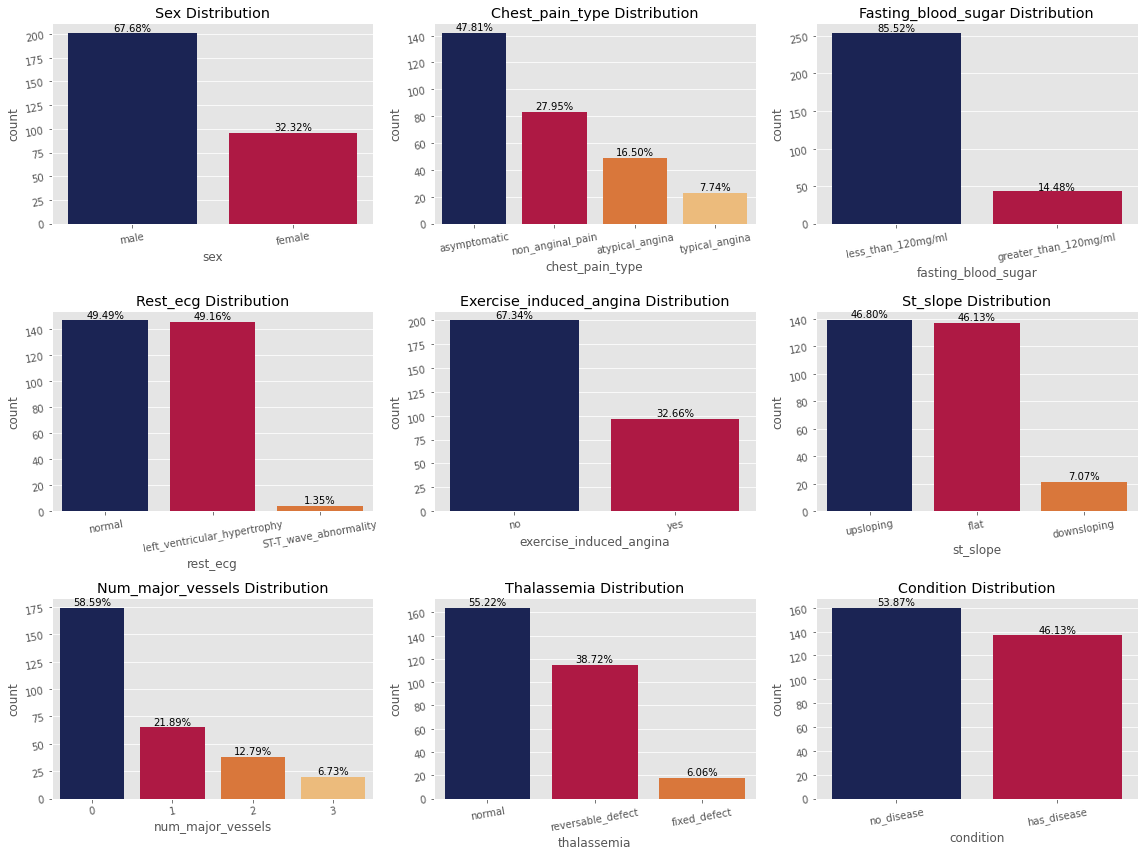

In [ ]:
# Display categorical data:

ctg_dist(train, categorical)

**Numeric Data**

  - Most of the continuous variables are somehow close to a gaussian distribution with small skews (left or right) except for oldpeak. 
  - Again there are some outliers espacially a strong one in Cholesterol worth taking a closer look at.

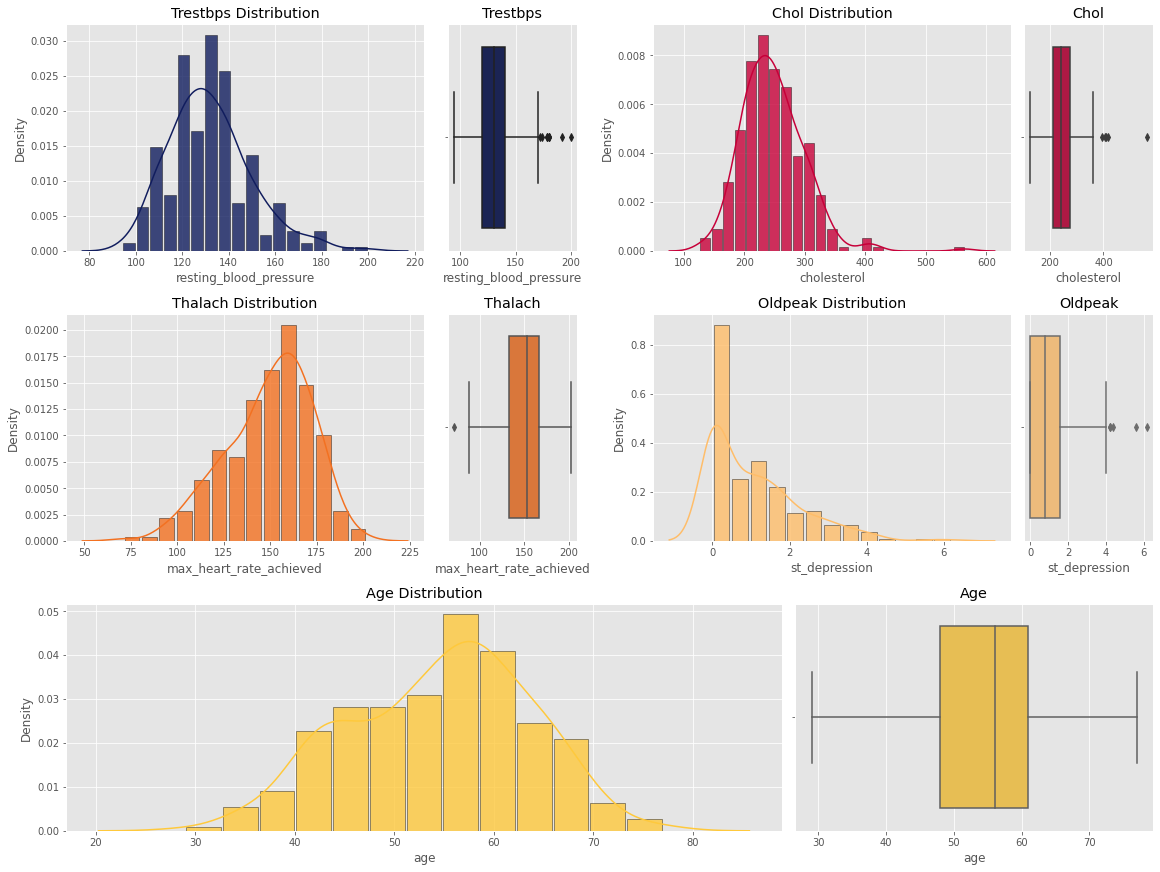

In [ ]:
# Displaying numeric distribution:

fig = plt.figure(constrained_layout=True, figsize=(16, 12))


grid = gridspec.GridSpec(ncols=6, nrows=3, figure=fig)
    #Most of the continuous variables are somehow close to a gaussian distribution with small skews (left or right) except for oldpeak.
    #Again there are some outliers espacially a strong one in Cholesterol worth taking a closer look at.


ax1 = fig.add_subplot(grid[0, :2])

ax1.set_title('Trestbps Distribution')

sns.distplot(train[continuous[1]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[0])

ax15 = fig.add_subplot(grid[0, 2:3])

ax15.set_title('Trestbps')

sns.boxplot(train[continuous[1]], orient='v', color=cust_palt[0])

ax2 = fig.add_subplot(grid[0, 3:5])

ax2.set_title('Chol Distribution')

sns.distplot(train[continuous[2]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[1])

ax25 = fig.add_subplot(grid[0, 5:])

ax25.set_title('Chol')

sns.boxplot(train[continuous[2]], orient='v', color=cust_palt[1])

ax3 = fig.add_subplot(grid[1, :2])

ax3.set_title('Thalach Distribution')

sns.distplot(train[continuous[3]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[2])

ax35 = fig.add_subplot(grid[1, 2:3])

ax35.set_title('Thalach')

sns.boxplot(train[continuous[3]], orient='v', color=cust_palt[2])

ax4 = fig.add_subplot(grid[1, 3:5])

ax4.set_title('Oldpeak Distribution')

sns.distplot(train[continuous[4]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[3])

ax45 = fig.add_subplot(grid[1, 5:])

ax45.set_title('Oldpeak')

sns.boxplot(train[continuous[4]], orient='v', color=cust_palt[3])

ax5 = fig.add_subplot(grid[2, :4])

ax5.set_title('Age Distribution')

sns.distplot(train[continuous[0]],
                 hist_kws={
                 'rwidth': 0.95,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[4])

ax55 = fig.add_subplot(grid[2, 4:])

ax55.set_title('Age')

sns.boxplot(train[continuous[0]], orient='h', color=cust_palt[4])

plt.show()


**Bivariate Analysis:**

  - Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. 
    - Bivariate analysis can be helpful in testing simple hypotheses of association.

In this part we going to take our variables and compare them against our target condition which is if the observed patient has a disease or not.

**Categorical Data vs Target**

  **Here we can presume that...**
  - Males are much more likely for heart diseases.
  - Chest pain type is very subjective and has no direct relation on the outcome, asymptomatic chest pains having highest disease outcome.
  - Blood sugar has no direct effect on the disease.
  - Rest ECG results showing no direct results but having normal ECG is pretty good sign. Even though it's pretty rare in the data, if you ST-T wave abnormality you are 3 times more likely to have heart disease.
  - Having exercise induced angina is pretty strong indicator for heart disease, patients are almost 3 times more likely to have disease if they have exercise induced angina. Meanwhile it's less than half for not having it.
  - Patients who had flat slope distribution are more likely to have disease.
  - Number of major vessels observed seems on similar levels for patients who have disease but 0 observations is good sign for not having disease.
  - Having defected thalium test results is pretty strong indicator for heart disease.

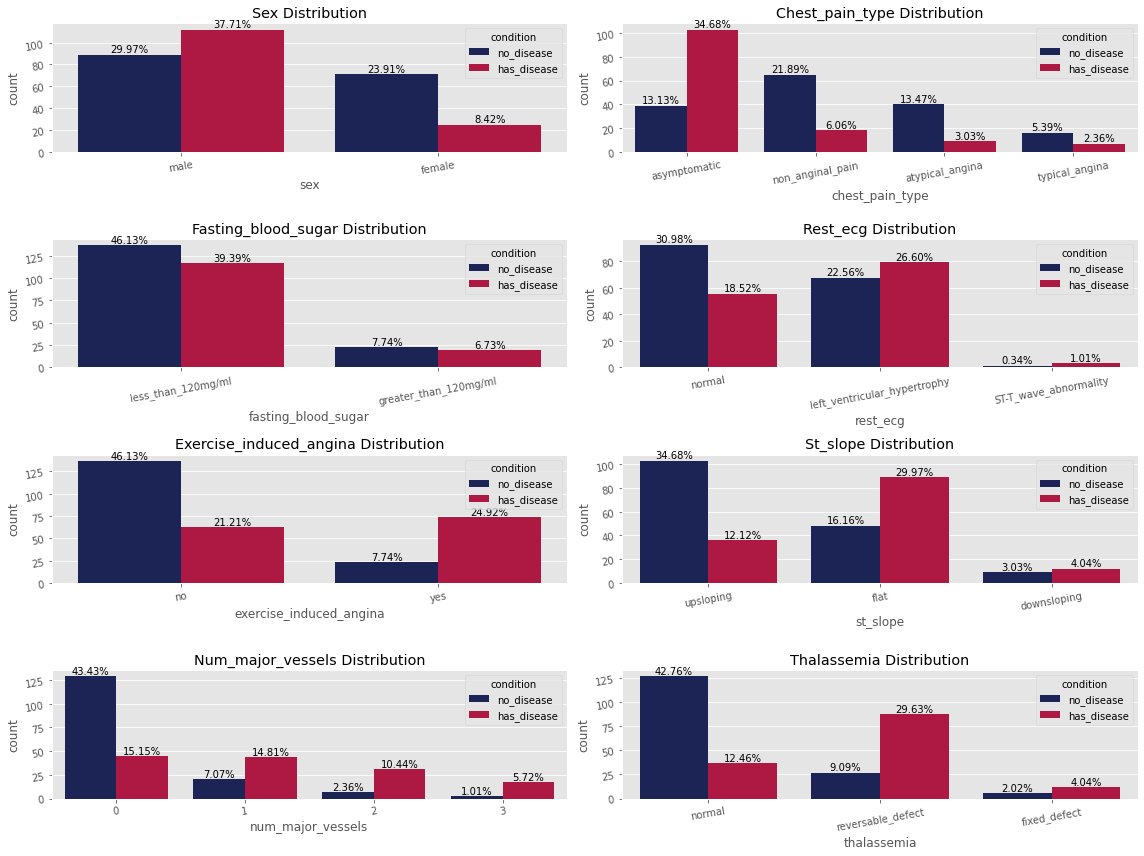

In [ ]:
# Categorical data vs condition:

ctg_dist(train, categorical[:-1], 'condition', 4, 2)

**Numerical Data vs Target**

**Here we can make the following assumptions:**
  - Having higher resting blood pressure shows you are little bit more likely to have heart disease.
  - Again same for Cholesterol, it's not strong indicator but patients are little bit more likely to have disease with high cholesterol. There's is also one outlier there with no disease, pretty interesting.
  - I find max heart rate distribution a bit interesting, expecting the other way around but it might be due to testing conditions and if you have normal results on ECG while exercising instructors might be increasing your excercise density?
  - It's pretty clear that heart disease likelihood increases with ST depression levels...
  - Finally, older patients are more likely to have heart disease.



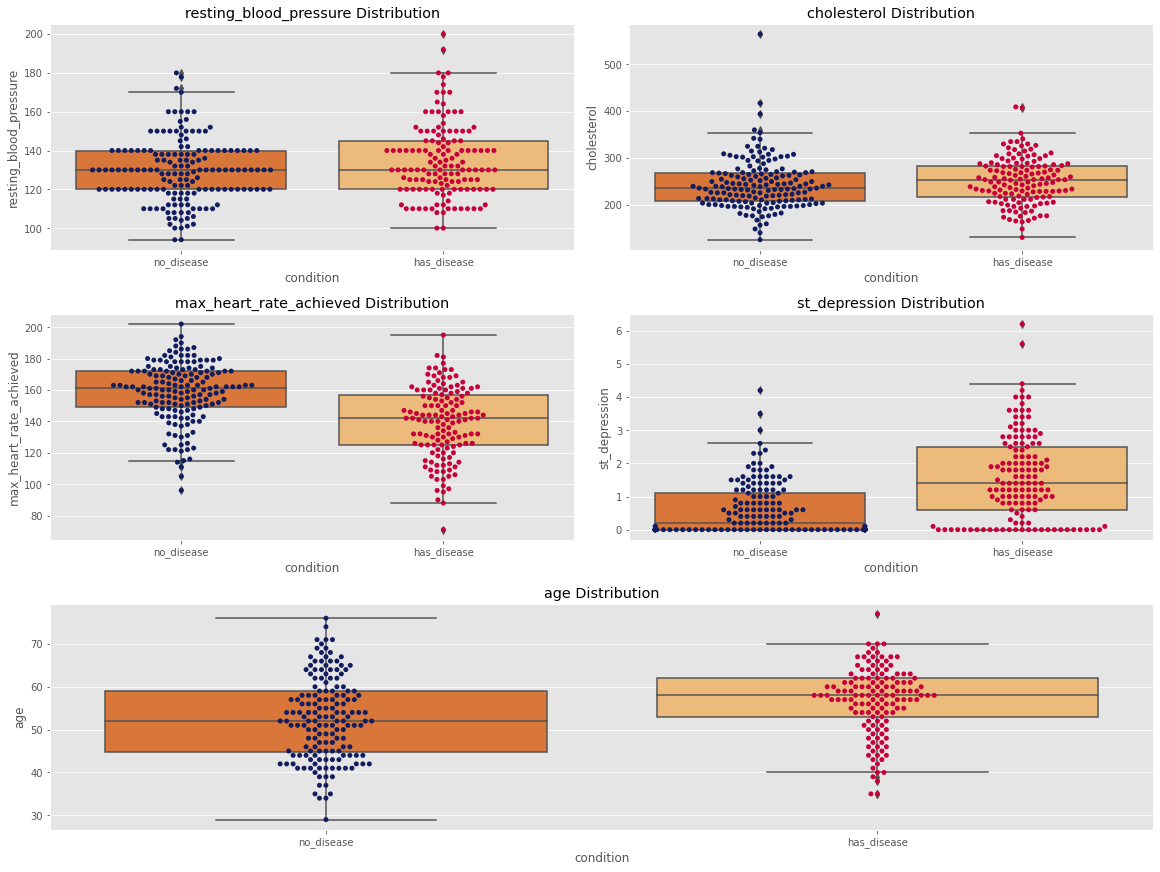

In [ ]:
# Displaying numeric distribution vs condition:

fig = plt.figure(constrained_layout=True, figsize=(16, 12))


grid = gridspec.GridSpec(ncols=4, nrows=3, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])

ax1.set_title('resting_blood_pressure Distribution')

sns.boxplot(x='condition',
                    y='resting_blood_pressure',
                    data=train,
                    palette=cust_palt[2:],
                    ax=ax1)
sns.swarmplot(x='condition',
                    y='resting_blood_pressure',
                    data=train,
                    palette=cust_palt[:2],
                    ax=ax1)

ax2 = fig.add_subplot(grid[0, 2:])

ax2.set_title('cholesterol Distribution')

sns.boxplot(x='condition',
                    y='cholesterol',
                    data=train,
                    palette=cust_palt[2:],
                    ax=ax2)
sns.swarmplot(x='condition',
                    y='cholesterol',
                    data=train,
                    palette=cust_palt[:2],
                    ax=ax2)

ax3 = fig.add_subplot(grid[1, :2])

ax3.set_title('max_heart_rate_achieved Distribution')

sns.boxplot(x='condition',
                    y='max_heart_rate_achieved',
                    data=train,
                    palette=cust_palt[2:],
                    ax=ax3)
sns.swarmplot(x='condition',
                    y='max_heart_rate_achieved',
                    data=train,
                    palette=cust_palt[:2],
                    ax=ax3)

ax4 = fig.add_subplot(grid[1, 2:])

ax4.set_title('st_depression Distribution')

sns.boxplot(x='condition',
                    y='st_depression',
                    data=train,
                    palette=cust_palt[2:],
                    ax=ax4)
sns.swarmplot(x='condition',
                    y='st_depression',
                    data=train,
                    palette=cust_palt[:2],
                    ax=ax4)

ax5 = fig.add_subplot(grid[2, :])

ax5.set_title('age Distribution')

sns.boxplot(x='condition',
                    y='age',
                    data=train,
                    palette=cust_palt[2:],
                    ax=ax5)
sns.swarmplot(x='condition',
                    y='age',
                    data=train,
                    palette=cust_palt[:2],
                    ax=ax5)
plt.show()

**Correlation Analysis:**

 - Use pearson correlation to find linear relations between features. Heatmap is decent way to show these relations.

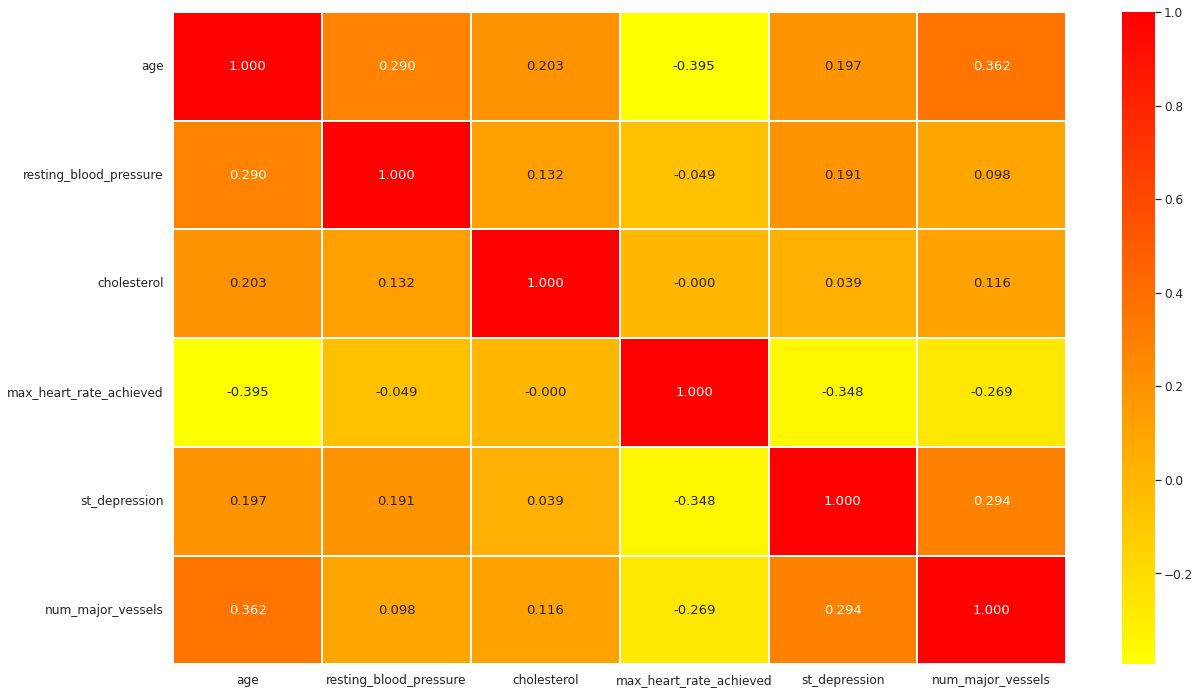

In [ ]:
# Correlation heatmap between variables:

sns.set(font_scale=1.1)
correlation_train = train.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.3f',
            cmap='autumn_r',
            linewidths=1,
            cbar=True)

plt.show()

**Modelling:**
  - We start by loading our train data and labels as X and y's and we get dummy variables for categorical data using one hot encoding[OHE]. Then we import loads of sklearn modules.

In [ ]:
#First load the dataset into a new variable called "heat_train"

# Loading data for corrmap:

heat_train = pd.read_csv('heart_cleveland_upload.csv')

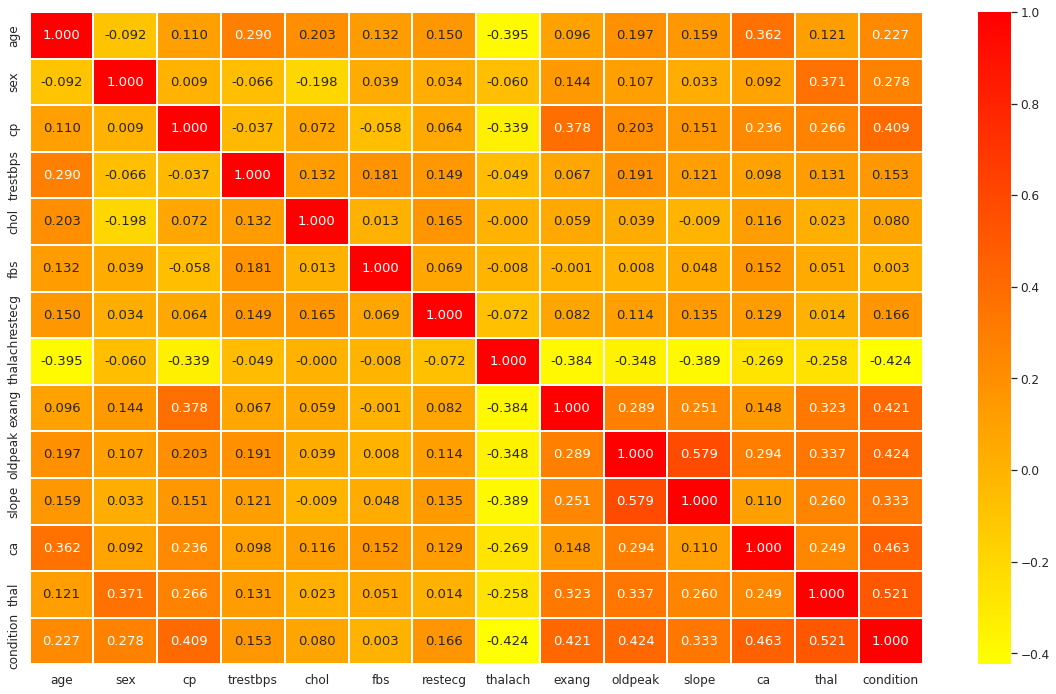

In [ ]:
# Correlation heatmap between variables:

sns.set(font_scale=1.1)
correlation_train = heat_train.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.3f',
            cmap='autumn_r',
            linewidths=1,
            cbar=True)

plt.show()

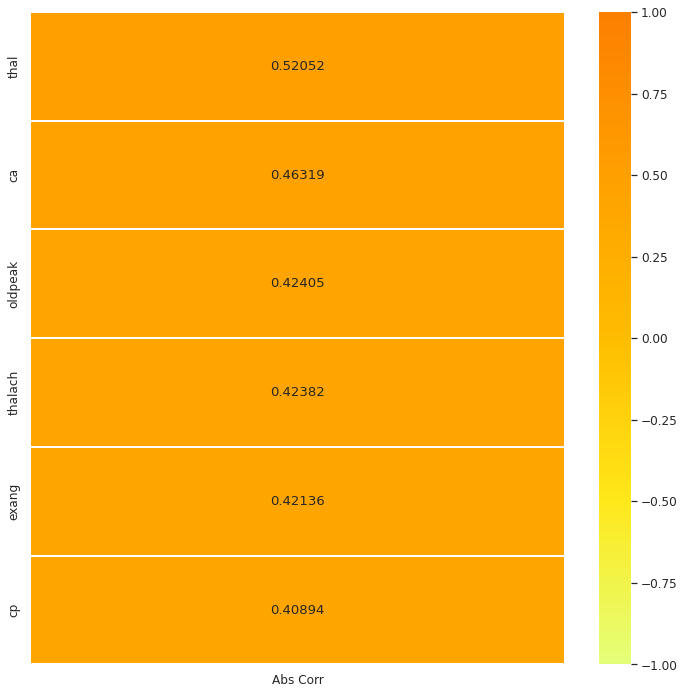

In [ ]:
#orr SELECT Top celated variables:

correlations = heat_train.corrwith(heat_train['condition']).iloc[:-1].to_frame()
correlations['Abs Corr'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('Abs Corr', ascending=False)['Abs Corr']
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(sorted_correlations.to_frame()[sorted_correlations>=.35], cmap='Wistia', annot=True, vmin=-1, vmax=1,linewidths=1,fmt='.5f', ax=ax);

**Modelling:**
  - We start by loading our train data and labels as X and y's and we get dummy variables for categorical data using one hot encoding. Then we import loads of sklearn modules.

In [ ]:
# Setting train and condition data:

X = train.drop('condition', axis=1)
y = heat_train['condition']

In [ ]:
# One hot encoding train features:

ctg_df = pd.get_dummies(data=train[['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'st_slope', 'num_major_vessels', 'thalassemia']])
X.drop(['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'st_slope', 'num_major_vessels', 'thalassemia'], axis=1, inplace=True)
X = pd.concat([X, ctg_df], axis=1)

In [ ]:
# Loading sklearn packages:

from sklearn.model_selection import cross_validate, KFold, learning_curve,  cross_val_score, RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.covariance import EllipticEnvelope
from sklearn.decomposition import PCA
from sklearn.metrics import plot_confusion_matrix

**Classifiers:**

**Some notes about each of the cassifier...**

**GradientBoostingClassifier:**
  - Gradient Tree Boosting or Gradient Boosted Decision Trees (GBDT) is a generalization of boosting to arbitrary differentiable loss functions. GBDT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems in a variety of areas including Web search ranking and ecology.

**K-Nearest Neighbors Classifier:**
  - Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

**Decision Tree Classifier:**
  - Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. Decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.

**Support Vector Machines:**
  - Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

**The advantages of support vector machines are:**

Effective in high dimensional spaces.
Still effective in cases where number of dimensions is greater than the number of samples.

Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

**Random Forest Classifier:**

The sklearn.ensemble module includes two averaging algorithms based on randomized decision trees: the RandomForest algorithm and the Extra-Trees method. Both algorithms are perturb-and-combine technique specifically designed for trees. This means a diverse set of classifiers is created by introducing randomness in the classifier construction. The prediction of the ensemble is given as the averaged prediction of the individual classifiers.

**AdaBoost Classifier:**

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

**MLP Classifier:**

Multi-layer Perceptron classifier: This model optimizes the log-loss function using LBFGS or stochastic gradient descent.

**GaussianNB:**

GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian.


In [ ]:
# Selecting some classifiers:

gradclass = GradientBoostingClassifier(random_state=seed)

knclass = KNeighborsClassifier()

dectree = DecisionTreeClassifier(random_state=seed)

svc = SVC()

randfclass = RandomForestClassifier(random_state=seed)

adaclass = AdaBoostClassifier(random_state=seed)

mlpclass = MLPClassifier(random_state=seed)

gsclass = GaussianNB()

In [ ]:
# Setting (K-fold) 5 fold CV:

cv = KFold(5, shuffle=True, random_state=seed)

classifiers = [gradclass, knclass, dectree, svc, randfclass, adaclass, mlpclass, gsclass]

In [ ]:
def model_check(X, y, classifiers, cv):
    
    ''' A function for testing multiple classifiers and return various performance metrics. '''
    
    model_table = pd.DataFrame()

    row_index = 0
    for cls in classifiers:

        MLA_name = cls.__class__.__name__
        model_table.loc[row_index, 'Model Name'] = MLA_name
        
        cv_results = cross_validate(
            cls,
            X,
            y,
            cv=cv,
            scoring=('accuracy','f1','roc_auc'),
            return_train_score=True,
            n_jobs=-1
        )
        model_table.loc[row_index, 'Train Roc/AUC Mean'] = cv_results[
            'train_roc_auc'].mean()
        model_table.loc[row_index, 'Test Roc/AUC Mean'] = cv_results[
            'test_roc_auc'].mean()
        model_table.loc[row_index, 'Test Roc/AUC Std'] = cv_results['test_roc_auc'].std()
        model_table.loc[row_index, 'Train Accuracy Mean'] = cv_results[
            'train_accuracy'].mean()
        model_table.loc[row_index, 'Test Accuracy Mean'] = cv_results[
            'test_accuracy'].mean()
        model_table.loc[row_index, 'Test Acc Std'] = cv_results['test_accuracy'].std()
        model_table.loc[row_index, 'Train F1 Mean'] = cv_results[
            'train_f1'].mean()
        model_table.loc[row_index, 'Test F1 Mean'] = cv_results[
            'test_f1'].mean()
        model_table.loc[row_index, 'Test F1 Std'] = cv_results['test_f1'].std()
        model_table.loc[row_index, 'Time'] = cv_results['fit_time'].mean()

        row_index += 1        

    model_table.sort_values(by=['Test F1 Mean'],
                            ascending=False,
                            inplace=True)

    return model_table

**Result Discussion:**

  - We have many metrics but I decided to sort them by F1 score since precision and recall is important in this case. Looking at our first result, RandomForestClassifier is the best performing one in the list, followed by MLP and GradientBoosting classifiers.

  - But we can see most of our decision tree based models are overfitting, that's something we should take a look at soon...

In [ ]:
# Baseline check:

raw_models = model_check(X, y, classifiers, cv)

display(raw_models)

,Model Name,Train Roc/AUC Mean,Test Roc/AUC Mean,Test Roc/AUC Std,Train Accuracy Mean,Test Accuracy Mean,Test Acc Std,Train F1 Mean,Test F1 Mean,Test F1 Std,Time
4,RandomForestClassifier,1.000000,0.908139,0.046801,1.000000,0.831695,0.052705,1.000000,0.812917,0.056677,0.211270
6,MLPClassifier,0.943029,0.905784,0.053989,0.868705,0.818192,0.056538,0.848979,0.796519,0.059191,0.357794
0,GradientBoostingClassifier,0.999972,0.885312,0.053211,0.995791,0.814972,0.063174,0.995487,0.795906,0.062559,0.126912
7,GaussianNB,0.901929,0.893879,0.032092,0.836702,0.811695,0.052721,0.814794,0.790126,0.053867,0.006978
5,AdaBoostClassifier,0.986810,0.864971,0.064461,0.929309,0.787853,0.070837,0.922778,0.763340,0.074706,0.106892
2,DecisionTreeClassifier,1.000000,0.731797,0.050374,1.000000,0.730395,0.050089,1.000000,0.706855,0.053486,0.009186
1,KNeighborsClassifier,0.847549,0.684860,0.058935,0.770177,0.646780,0.057291,0.745321,0.593375,0.069607,0.006575
3,SVC,0.761350,0.736696,0.077651,0.678453,0.666836,0.052064,0.577783,0.562758,0.061458,0.011291


In [ ]:
def f_imp(classifiers, X, y, bins):
    
    ''' A function for displaying important features'''
    
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    axes = axes.flatten()

    for ax, classifier in zip(axes, classifiers):

        try:
            classifier.fit(X, y)
            feature_imp = pd.DataFrame(sorted(
                zip(classifier.feature_importances_, X.columns)),
                                       columns=['Value', 'Feature'])

            sns.barplot(x="Value",
                        y="Feature",
                        data=feature_imp.sort_values(by="Value",
                                                     ascending=False),
                        ax=ax,
                        palette='plasma')
            plt.title('Features')
            plt.tight_layout()
            ax.set(title=f'{classifier.__class__.__name__} Feature Impotances')
            ax.xaxis.set_major_locator(MaxNLocator(nbins=bins))
        except:
            continue
    plt.show()



**NOTE:** 

  - Since our decision tree based models overfitted,  I wanted to look which features mostly effected these decisions, I sampled two of the tree based models as presented below:

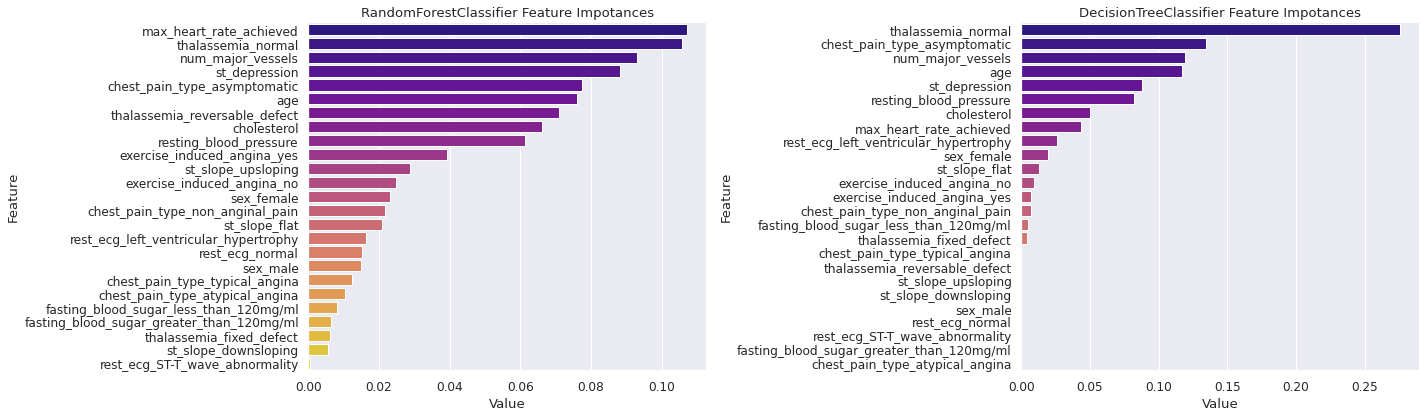

In [ ]:
# Feature importances:

f_imp([randfclass,dectree], X, y, 6)

**Automatic Outlier Detection:**

Before finetuning our models,  I decided to get rid of some outliers. We have pretty small database and we can actually remove them by hand or more basic methods. But I wanted to use what sklearn can offer us for this so we gonna try couple sklearn features.

**Isolation Forest:**

  - The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

  - Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

  - This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

  - Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

Basically I set contamination rate of our data to 10% and dropped them using masks. It didn't do great on the results, we have very small dataset and removing some reduces model performances. 

In [ ]:
# Applying Isolation Forest:

iso = IsolationForest(contamination=0.1,random_state=seed)
yhat = iso.fit_predict(X)

mask = (yhat != -1)

X_iso = X.loc[mask, :]
y_iso= y[mask]

In [ ]:
# Checking isolated models:

iso_models = model_check(X_iso, y_iso, classifiers, cv)
display(iso_models)

,Model Name,Train Roc/AUC Mean,Test Roc/AUC Mean,Test Roc/AUC Std,Train Accuracy Mean,Test Accuracy Mean,Test Acc Std,Train F1 Mean,Test F1 Mean,Test F1 Std,Time
7,GaussianNB,0.911465,0.878511,0.039401,0.834259,0.808945,0.043297,0.817561,0.793670,0.029050,0.004281
0,GradientBoostingClassifier,1.000000,0.881188,0.020325,0.998126,0.812718,0.012055,0.997799,0.784525,0.042853,0.127502
4,RandomForestClassifier,1.000000,0.896893,0.019932,1.000000,0.801328,0.033744,1.000000,0.766313,0.058321,0.211165
6,MLPClassifier,0.929163,0.880803,0.011143,0.833338,0.793920,0.027040,0.817724,0.761725,0.060409,0.268766
5,AdaBoostClassifier,0.991044,0.848844,0.024452,0.951327,0.775262,0.011891,0.945263,0.739753,0.025403,0.107279
2,DecisionTreeClassifier,1.000000,0.749620,0.026192,1.000000,0.756674,0.025272,1.000000,0.720922,0.039039,0.007043
1,KNeighborsClassifier,0.836381,0.686548,0.093458,0.760335,0.663103,0.082195,0.718739,0.598791,0.071875,0.005225
3,SVC,0.760132,0.735924,0.040801,0.676034,0.655625,0.081963,0.538764,0.510568,0.067872,0.010514
